# Importing the relevant libraries and data
Here we are importing relevant libraeies as well as getting a glimpse of the data we need to see

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
title = pd.read_csv("./data/title.basics.csv")
ratings = pd.read_csv("./data/title.ratings.csv")
movie = pd.read_csv("./data/bom.movie_gross.csv")

In [71]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [72]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [73]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Title Data
The title dataset includes a wide variety of movie titles, genre and the duration of the movies

In [74]:
title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [75]:
# make the columns name easier to use
title.columns = title.columns.str.lower().str.replace(' ', '_')

#drop unnecessary columns
title.drop(columns = ['original_title' , 'runtime_minutes' ], inplace = True)

In [76]:
#T0D0: How would you split the joint genres to show the different one
# ANswered: we use a split function

In [77]:
# Remove all duplicates
title.drop_duplicates(subset = 'primary_title', keep = 'first', inplace = True)
title

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,NaN


# Ratings Data
The ratings dataset includes a wide variety of movie titles, the different ratings and the number of people who have voted for that movie 


In [78]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [79]:
# Remove columns that we dont need
ratings.drop(columns = ['numvotes'], inplace = True)
ratings

,tconst,averagerating
0,tt10356526,8.30
1,tt10384606,8.90
2,tt1042974,6.40
3,tt1043726,4.20
4,tt1060240,6.50
...,...,...
73851,tt9805820,8.10
73852,tt9844256,7.50
73853,tt9851050,4.70
73854,tt9886934,7.00


In [80]:
#something we can do here is merge the 2 tables(ratings and title) with tconst

# Movies Data
This contains the movie titles and the gross they made in order to know what was succcessful

In [81]:
movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010


In [82]:
# Remove columns we dont need
movie.drop(columns = ['foreign_gross'], inplace = True)

In [83]:
# Remove all the duplicate values
movie.drop_duplicates(subset = 'title', keep = 'first', inplace = True)
movie

,title,studio,domestic_gross,year
0,Toy Story 3,BV,"415,000,000.00",2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",2010
3,Inception,WB,"292,600,000.00",2010
4,Shrek Forever After,P/DW,"238,700,000.00",2010
...,...,...,...,...
3382,The Quake,Magn.,"6,200.00",2018
3383,Edward II (2018 re-release),FM,"4,800.00",2018
3384,El Pacto,Sony,"2,500.00",2018
3385,The Swan,Synergetic,"2,400.00",2018


In [84]:
# changing name title to primary_title to assist when merging
movie = movie.rename(columns = {'title' : 'primary_title'})
movie

,primary_title,studio,domestic_gross,year
0,Toy Story 3,BV,"415,000,000.00",2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",2010
3,Inception,WB,"292,600,000.00",2010
4,Shrek Forever After,P/DW,"238,700,000.00",2010
...,...,...,...,...
3382,The Quake,Magn.,"6,200.00",2018
3383,Edward II (2018 re-release),FM,"4,800.00",2018
3384,El Pacto,Sony,"2,500.00",2018
3385,The Swan,Synergetic,"2,400.00",2018


The datasets are cleaned and ready to be used
We have discovered that the dataset tile and Ratings have a common column tconst, while Title and Movie share primary_title.

Therefore we are able to merge the datasets

# Merging Datasets

In [85]:
# merge title and ratings through the column tconst
movie_ratings_df = pd.merge( title, ratings, on = 'tconst')
movie_ratings_df

,tconst,primary_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50
...,...,...,...,...,...
68822,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,8.40
68823,tt9913056,Swarm Season,2019,Documentary,6.20
68824,tt9913084,Diabolik sono io,2019,Documentary,6.20
68825,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.70


In [86]:
# Merge movie_ratings_df and movie through the column primary_title
movie_df = pd.merge(movie_ratings_df, movie, on = 'primary_title')
movie_df

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.10,Relbig.,"1,100,000.00",2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.10,IFC,"744,000.00",2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.30,Fox,"58,200,000.00",2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.50,Uni.,"26,300,000.00",2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.00,Uni.,"652,300,000.00",2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.10,FM,300.00,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.50,WGUSA,"747,000.00",2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.40,Eros,"72,000.00",2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.40,CL,"181,000.00",2018


In [87]:
# save the new dataset as a CSV file on the local device
movie_df.to_csv('C:/Users/Nonny Kahuko/Desktop/datascience/phase-1-project/movie_df.csv', index = False)

# 1. The top 5 richest studios

Now that we have a dataframe we find top 5 movie studios ranked according to their domestic gross

In [88]:
#import the newly made dataframe

movie_df = pd.read_csv('movie_df.csv')

In [89]:
movie_df

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.10,Relbig.,"1,100,000.00",2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.10,IFC,"744,000.00",2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.30,Fox,"58,200,000.00",2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.50,Uni.,"26,300,000.00",2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.00,Uni.,"652,300,000.00",2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.10,FM,300.00,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.50,WGUSA,"747,000.00",2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.40,Eros,"72,000.00",2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.40,CL,"181,000.00",2018


In [90]:
#sort the data from highest to lowest
movie_df.sort_values('domestic_gross', ascending = False).head(5)

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
1035,tt1825683,Black Panther,2018,"Action,Adventure,Sci-Fi",7.30,BV,"700,100,000.00",2018
2094,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.50,BV,"678,800,000.00",2018
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.00,Uni.,"652,300,000.00",2015
1602,tt2527336,Star Wars: The Last Jedi,2017,"Action,Adventure,Fantasy",7.10,BV,"620,200,000.00",2017
1943,tt3606756,Incredibles 2,2018,"Action,Adventure,Animation",7.70,BV,"608,600,000.00",2018


In [91]:
# create a dataframe that counts all the money made by each studio per year
# Group the data by 'studio' and 'year', and sum the 'domestic_gross' for each group
studio_year_gross = movie_df.groupby(['studio', 'year'])['domestic_gross'].sum().reset_index()

# Pivot the data to create the desired DataFrame format
studio_gross_per_year = studio_year_gross.pivot_table(index='studio', columns='year', values='domestic_gross', fill_value=0)

# Reset the index to make 'studio' a regular column instead of an index
studio_gross_per_year.reset_index(inplace=True)

# Display the resulting DataFFrame
print(studio_gross_per_year)

year studio       2010       2011       2012       2013       2014       2015  \
0        3D    6100000          0          0          0          0          0   
1       A23          0     151000          0      13200          0          0   
2       A24          0          0          0   27845400   16388300   51275100   
3       ADC          0          0          0          0          0     228000   
4        AF          0          0    1000000      76900     558000     353000   
..      ...        ...        ...        ...        ...        ...        ...   
207   Wein.  145200000  146896100  364426999  248081000  226045500  193563099   
208      XL          0          0          0     117000          0          0   
209    Yash      43800     496000    5352600    8000000          0    1800000   
210     Zee          0          0          0          0          0          0   
211   Zeit.          0      71200     317000     785000     504700      22900   

year      2016      2017   

In [92]:
studio_gross_per_year.dropna(inplace = True)

In [93]:
studio_gross_per_year

year,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,3D,6100000,0,0,0,0,0,0,0,0
1,A23,0,151000,0,13200,0,0,0,0,0
2,A24,0,0,0,27845400,16388300,51275100,39168000,81405700,45848000
3,ADC,0,0,0,0,0,228000,0,20200,0
4,AF,0,0,1000000,76900,558000,353000,0,0,0
...,...,...,...,...,...,...,...,...,...,...
207,Wein.,145200000,146896100,364426999,248081000,226045500,193563099,9400000,78356000,0
208,XL,0,0,0,117000,0,0,0,0,0
209,Yash,43800,496000,5352600,8000000,0,1800000,8500000,6530000,0
210,Zee,0,0,0,0,0,0,1100000,0,0


In [94]:
# create a column that has the totals
studio_gross_per_year['total'] = studio_gross_per_year.sum(axis=1)
studio_gross_per_year

year,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
0,3D,6100000,0,0,0,0,0,0,0,0,6100000
1,A23,0,151000,0,13200,0,0,0,0,0,164200
2,A24,0,0,0,27845400,16388300,51275100,39168000,81405700,45848000,261930500
3,ADC,0,0,0,0,0,228000,0,20200,0,248200
4,AF,0,0,1000000,76900,558000,353000,0,0,0,1987900
...,...,...,...,...,...,...,...,...,...,...,...
207,Wein.,145200000,146896100,364426999,248081000,226045500,193563099,9400000,78356000,0,1411968698
208,XL,0,0,0,117000,0,0,0,0,0,117000
209,Yash,43800,496000,5352600,8000000,0,1800000,8500000,6530000,0,30722400
210,Zee,0,0,0,0,0,0,1100000,0,0,1100000


In [95]:
#create a dataset for the top 5 studios
studio_gross_per_year5 = studio_gross_per_year.sort_values('total', ascending = False).head(5)
studio_gross_per_year5

year,studio,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
30,BV,950900000,985000000,829800000,1581500000,1519600000,1357799999,2430800000,1664500000,2946400000,14266299999
194,Uni.,872900000,939400000,873300000,1395800000,838800000,2384338000,1378000000,1363300000,1107222000,11153060000
78,Fox,756300000,1005300000,912200000,986200000,1555400000,1191999999,1441899999,970000000,707400000,9526699998
202,WB,989800000,1135300000,1180100000,925400000,736800000,634800000,1149200000,1214300000,1340600000,9306300000
177,Sony,918599999,701000000,1197700000,715299999,612600000,695511000,339195500,997241500,485390000,6662537998


In [96]:
# saving CSV file
studio_gross_per_year5.to_csv('C:/Users/Nonny Kahuko/Desktop/datascience/phase-1-project/studio_gross_per_year5.csv', index = False)

In [97]:
#converting it into a list
studio = studio_gross_per_year5.set_index('studio').to_dict()['total']
studio

{'BV': 14266299999,
 'Uni.': 11153060000,
 'Fox': 9526699998,
 'WB': 9306300000,
 'Sony': 6662537998}

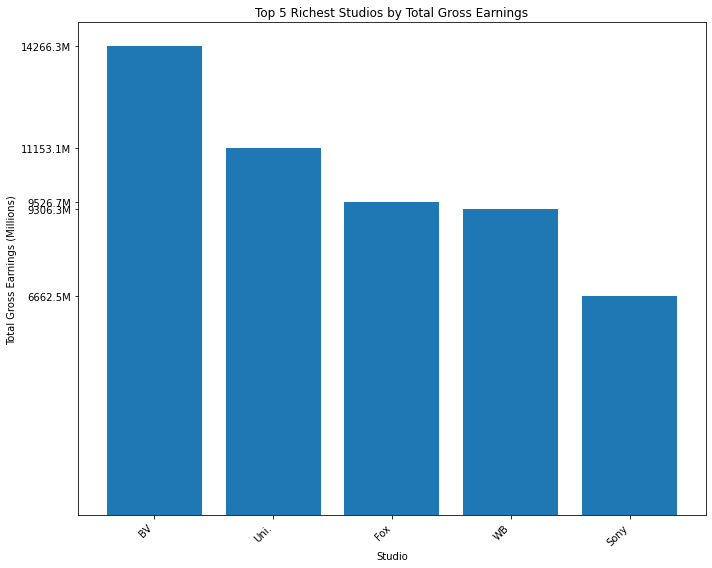

In [98]:
# Sort the DataFrame by the 'Total' column in descending order
sorted_studios = studio_gross_per_year5.sort_values('total', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 8))
plt.bar(studio_gross_per_year5['studio'], studio_gross_per_year5['total'])
plt.xlabel('Studio')
plt.ylabel('Total Gross Earnings (Millions)')
plt.title('Top 5 Richest Studios by Total Gross Earnings')

# Convert y-axis tick labels to millions
plt.yticks(studio_gross_per_year5['total'], ['{:.1f}M'.format(val / 1e6) for val in studio_gross_per_year5['total']])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Top5_studios.png")
plt.show()

# 2. Top 10 most earned genres in the studios

In [99]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          2549 non-null   object 
 1   primary_title   2549 non-null   object 
 2   start_year      2549 non-null   int64  
 3   genres          2548 non-null   object 
 4   averagerating   2549 non-null   float64
 5   studio          2546 non-null   object 
 6   domestic_gross  2532 non-null   float64
 7   year            2549 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 159.4+ KB


In [100]:
genre_df = movie_df.loc[:, ['primary_title', 'genres', 'studio', 'domestic_gross', 'year'
                      ]].sort_values('domestic_gross', ascending = False)

genre_df

,primary_title,genres,studio,domestic_gross,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,"700,100,000.00",2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,"678,800,000.00",2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,"652,300,000.00",2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,"620,200,000.00",2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,"608,600,000.00",2018
...,...,...,...,...,...
1204,Force,"Action,Thriller",FoxS,nan,2011
1329,Keith Lemon: The Film,Comedy,NaN,nan,2012
1445,Jessabelle,"Horror,Thriller",LGF,nan,2014
1631,Viral,"Comedy,Horror,Thriller",W/Dim.,nan,2016


In [101]:
#Chcking how many null values are there
genre_df.isnull().sum(axis = 0)

primary_title      0
genres             1
studio             3
domestic_gross    17
year               0
dtype: int64

In [102]:
#Removing the null values
genre_df.dropna(subset = ['domestic_gross'], inplace = True)
genre_df

,primary_title,genres,studio,domestic_gross,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,"700,100,000.00",2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,"678,800,000.00",2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,"652,300,000.00",2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,"620,200,000.00",2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,"608,600,000.00",2018
...,...,...,...,...,...
207,2:22,Thriller,Magn.,400.00,2017
967,Apartment 143,"Horror,Thriller",Magn.,400.00,2012
2223,Satanic,Horror,Magn.,300.00,2016
2544,The Chambermaid,Drama,FM,300.00,2015


In [103]:
# Create a dataset with all the top 5 studios and all the movies
topstudiogenre_df = genre_df[genre_df['studio'].isin(['BV', 'Uni.', 'Fox', 'WB', 'Sony'])]
topstudiogenre_df

,primary_title,genres,studio,domestic_gross,year
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,"700,100,000.00",2018
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,"678,800,000.00",2018
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,"652,300,000.00",2015
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,"620,200,000.00",2017
1943,Incredibles 2,"Action,Adventure,Animation",BV,"608,600,000.00",2018
...,...,...,...,...,...
2340,League of Gods,"Action,Fantasy",Sony,"182,000.00",2016
2449,Poster Boys,Comedy,Sony,"97,000.00",2017
2197,Loving Pablo,"Action,Biography,Crime",Uni.,"22,000.00",2018
2315,The Duelist,"Action,Drama,Thriller",Sony,"13,500.00",2016


In [104]:
topstudiogenre_df.to_csv('C:/Users/Nonny Kahuko/Desktop/datascience/phase-1-project/TopStudioGenre.csv', index = False)

In [105]:
# We now split the genres into 3 using a split function
topstudiogenre_df[['Genre1', 'Genre2', 'Genre3']] = topstudiogenre_df['genres'].str.split(',' , expand = True)
topstudiogenre_df

C:\Users\Nonny Kahuko\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,primary_title,genres,studio,domestic_gross,year,Genre1,Genre2,Genre3
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,"700,100,000.00",2018,Action,Adventure,Sci-Fi
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,"678,800,000.00",2018,Action,Adventure,Sci-Fi
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,"652,300,000.00",2015,Action,Adventure,Sci-Fi
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,"620,200,000.00",2017,Action,Adventure,Fantasy
1943,Incredibles 2,"Action,Adventure,Animation",BV,"608,600,000.00",2018,Action,Adventure,Animation
...,...,...,...,...,...,...,...,...
2340,League of Gods,"Action,Fantasy",Sony,"182,000.00",2016,Action,Fantasy,None
2449,Poster Boys,Comedy,Sony,"97,000.00",2017,Comedy,None,None
2197,Loving Pablo,"Action,Biography,Crime",Uni.,"22,000.00",2018,Action,Biography,Crime
2315,The Duelist,"Action,Drama,Thriller",Sony,"13,500.00",2016,Action,Drama,Thriller


In [106]:
topstudiogenre_df

,primary_title,genres,studio,domestic_gross,year,Genre1,Genre2,Genre3
1035,Black Panther,"Action,Adventure,Sci-Fi",BV,"700,100,000.00",2018,Action,Adventure,Sci-Fi
2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,"678,800,000.00",2018,Action,Adventure,Sci-Fi
4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,"652,300,000.00",2015,Action,Adventure,Sci-Fi
1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,"620,200,000.00",2017,Action,Adventure,Fantasy
1943,Incredibles 2,"Action,Adventure,Animation",BV,"608,600,000.00",2018,Action,Adventure,Animation
...,...,...,...,...,...,...,...,...
2340,League of Gods,"Action,Fantasy",Sony,"182,000.00",2016,Action,Fantasy,None
2449,Poster Boys,Comedy,Sony,"97,000.00",2017,Comedy,None,None
2197,Loving Pablo,"Action,Biography,Crime",Uni.,"22,000.00",2018,Action,Biography,Crime
2315,The Duelist,"Action,Drama,Thriller",Sony,"13,500.00",2016,Action,Drama,Thriller


In [107]:
#Showing the list of genres
Topgenre = topstudiogenre_df[['Genre1','Genre2', 'Genre3']].stack().value_counts()
Topgenre

Comedy         224
Adventure      197
Action         194
Drama          177
Thriller        74
Animation       66
Crime           64
Fantasy         55
Romance         53
Sci-Fi          52
Family          52
Biography       39
Horror          30
Mystery         29
History         15
Sport           11
Music           11
Documentary      8
War              4
Western          2
Musical          2
dtype: int64

In [108]:
# Convert to Dictionary 
Topgenre = Topgenre.to_dict()

In [109]:
#convert to a df
Topgenre = pd.DataFrame.from_dict(Topgenre,  orient = 'index')
Topgenre

,0
Comedy,224
Adventure,197
Action,194
Drama,177
Thriller,74
Animation,66
Crime,64
Fantasy,55
Romance,53
Sci-Fi,52


In [110]:
Topgenre = Topgenre.reset_index()
Topgenre

,index,0
0,Comedy,224
1,Adventure,197
2,Action,194
3,Drama,177
4,Thriller,74
5,Animation,66
6,Crime,64
7,Fantasy,55
8,Romance,53
9,Sci-Fi,52


In [111]:
# rename the columns
Topgenre.columns = ['genres', 'Num_movies']
Topgenre

,genres,Num_movies
0,Comedy,224
1,Adventure,197
2,Action,194
3,Drama,177
4,Thriller,74
5,Animation,66
6,Crime,64
7,Fantasy,55
8,Romance,53
9,Sci-Fi,52


In [112]:
#topgenre = pd.melt(genre_df, id_vars = ['domestic_gross'], value_name = 'genres', value_vars = ['Genre1', 'Genre2', 'Genre3'])
#topgenre = genre_df.drop('variable', axis = 1).groupby('genres').sum().reset_index()
#Genre1_df = pd.melt(genre_df, id_vars = ['domestic_gross'], value_name = 'genres', value_vars = ['Genre1', 'Genre2', 'Genre3'])
#Genre1_df = genre_df.drop('variable', axis = 1).groupby('genres').sum().reset_index()

In [113]:
Genremean = pd.merge(Topgenre, genre_df, on = 'genres')
Genremean

,genres,Num_movies,primary_title,studio,domestic_gross,year
0,Comedy,224,Grown Ups,Sony,"162,000,000.00",2010
1,Comedy,224,Daddy's Home,Par.,"150,400,000.00",2015
2,Comedy,224,Neighbors,Uni.,"150,200,000.00",2014
3,Comedy,224,Grown Ups 2,Sony,"133,699,999.00",2013
4,Comedy,224,Anchorman 2: The Legend Continues,Par.,"125,200,000.00",2013
...,...,...,...,...,...,...
423,Documentary,8,Oro,Sony,"5,500.00",2017
424,Documentary,8,In the Basement,Strand,"3,600.00",2015
425,Documentary,8,That Sugar Film,Gold.,"3,500.00",2015
426,Documentary,8,The Iron Ministry,Icar.,"3,200.00",2015


In [114]:
Genremean.drop(columns = ['primary_title', 'studio', 'year'])

,genres,Num_movies,domestic_gross
0,Comedy,224,"162,000,000.00"
1,Comedy,224,"150,400,000.00"
2,Comedy,224,"150,200,000.00"
3,Comedy,224,"133,699,999.00"
4,Comedy,224,"125,200,000.00"
...,...,...,...
423,Documentary,8,"5,500.00"
424,Documentary,8,"3,600.00"
425,Documentary,8,"3,500.00"
426,Documentary,8,"3,200.00"


In [115]:
summed_gross_by_genre = Genremean.groupby('genres').agg({'Num_movies': 'first', 'domestic_gross': 'sum'}).reset_index()
summed_gross_by_genre

,genres,Num_movies,domestic_gross
0,Action,194,"24,471,300.00"
1,Animation,66,"101,474,200.00"
2,Comedy,224,"2,170,940,799.00"
3,Crime,64,"35,990,900.00"
4,Documentary,8,"587,829,699.00"
5,Drama,177,"1,253,855,798.00"
6,Family,52,"155,000.00"
7,Fantasy,55,"57,800.00"
8,Horror,30,"349,428,000.00"
9,Music,11,"3,400,000.00"


## Domestic Gross in relation to top 10 genres of the top 5 movie studios


In [116]:
# get the top 10 values
top_10_genres = summed_gross_by_genre.nlargest(10, 'domestic_gross').reset_index(drop=True)
top_10_genres

,genres,Num_movies,domestic_gross
0,Comedy,224,"2,170,940,799.00"
1,Drama,177,"1,253,855,798.00"
2,Documentary,8,"587,829,699.00"
3,Horror,30,"349,428,000.00"
4,Animation,66,"101,474,200.00"
5,Thriller,74,"97,318,300.00"
6,Crime,64,"35,990,900.00"
7,Action,194,"24,471,300.00"
8,Music,11,"3,400,000.00"
9,Romance,53,"1,846,000.00"


In [117]:
#display values in float
#locale.setlocale(locale.LC_ALL, '')  
pd.options.display.float_format = lambda x: '{:,.2f}'.format(x)
top_10_genres

,genres,Num_movies,domestic_gross
0,Comedy,224,"2,170,940,799.00"
1,Drama,177,"1,253,855,798.00"
2,Documentary,8,"587,829,699.00"
3,Horror,30,"349,428,000.00"
4,Animation,66,"101,474,200.00"
5,Thriller,74,"97,318,300.00"
6,Crime,64,"35,990,900.00"
7,Action,194,"24,471,300.00"
8,Music,11,"3,400,000.00"
9,Romance,53,"1,846,000.00"


Top 10 Genres

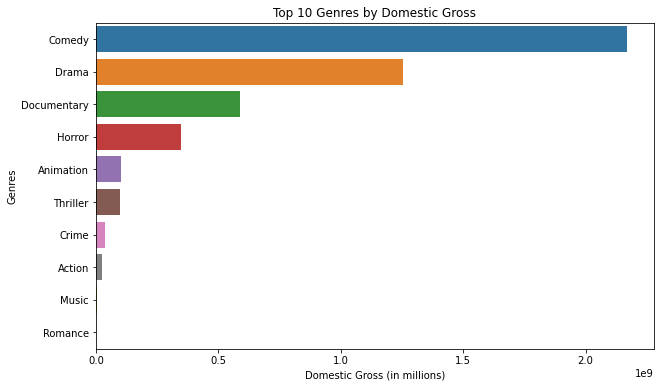

In [118]:
import seaborn as sns
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='domestic_gross', y='genres', data=top_10_genres)

# Optional: Add labels and title
plt.xlabel('Domestic Gross (in millions)')
plt.ylabel('Genres')
plt.title('Top 10 Genres by Domestic Gross')
plt.savefig("Top10_genres.png")
plt.show()  # Show the plot

# 3. Highest ratings per year per genre

From the top 5 richest studios analyse the the genres and how they performed each year

In [119]:
#import dataframe that contains the movies from the top 5 richest studios
Data = pd.read_csv("C:/Users/Nonny Kahuko/Desktop/datascience/phase-1-project/movie_df.csv")
Data

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.10,Relbig.,"1,100,000.00",2016
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.10,IFC,"744,000.00",2012
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.30,Fox,"58,200,000.00",2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.50,Uni.,"26,300,000.00",2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.00,Uni.,"652,300,000.00",2015
...,...,...,...,...,...,...,...,...
2544,tt8331988,The Chambermaid,2018,Drama,7.10,FM,300.00,2015
2545,tt8404272,How Long Will I Love U,2018,Romance,6.50,WGUSA,"747,000.00",2018
2546,tt8427036,Helicopter Eela,2018,Drama,5.40,Eros,"72,000.00",2018
2547,tt9078374,Last Letter,2018,"Drama,Romance",6.40,CL,"181,000.00",2018


In [120]:
#display from the top earning studios
Top5_df = Data[Data['studio'].isin(['BV', 'Uni.', 'Fox', 'WB', 'Sony'])]
Top5_df

,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.30,Fox,"58,200,000.00",2013
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.50,Uni.,"26,300,000.00",2014
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.00,Uni.,"652,300,000.00",2015
5,tt0372538,Spy,2011,"Action,Crime,Drama",6.60,Fox,"110,800,000.00",2015
8,tt0383010,The Three Stooges,2012,"Comedy,Family",5.10,Fox,"44,300,000.00",2012
...,...,...,...,...,...,...,...,...
2490,tt6966692,Green Book,2018,"Biography,Comedy,Drama",8.30,Uni.,"85,100,000.00",2018
2500,tt7074886,The Front Runner,2018,"Biography,Drama,History",6.20,Sony,"2,000,000.00",2018
2527,tt7690638,Soorma,2018,"Biography,Drama,Sport",7.40,Sony,"390,000.00",2018
2530,tt7752454,Detective Chinatown 2,2018,"Action,Comedy,Mystery",6.10,WB,"2,000,000.00",2018


In [121]:
#Split the genres
Top5_df[['Genre1', 'Genre2', 'Genre3']] = Top5_df['genres'].str.split(',' , expand = True)
Top5_df

C:\Users\Nonny Kahuko\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,tconst,primary_title,start_year,genres,averagerating,studio,domestic_gross,year,Genre1,Genre2,Genre3
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.30,Fox,"58,200,000.00",2013,Adventure,Comedy,Drama
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.50,Uni.,"26,300,000.00",2014,Action,Crime,Drama
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.00,Uni.,"652,300,000.00",2015,Action,Adventure,Sci-Fi
5,tt0372538,Spy,2011,"Action,Crime,Drama",6.60,Fox,"110,800,000.00",2015,Action,Crime,Drama
8,tt0383010,The Three Stooges,2012,"Comedy,Family",5.10,Fox,"44,300,000.00",2012,Comedy,Family,None
...,...,...,...,...,...,...,...,...,...,...,...
2490,tt6966692,Green Book,2018,"Biography,Comedy,Drama",8.30,Uni.,"85,100,000.00",2018,Biography,Comedy,Drama
2500,tt7074886,The Front Runner,2018,"Biography,Drama,History",6.20,Sony,"2,000,000.00",2018,Biography,Drama,History
2527,tt7690638,Soorma,2018,"Biography,Drama,Sport",7.40,Sony,"390,000.00",2018,Biography,Drama,Sport
2530,tt7752454,Detective Chinatown 2,2018,"Action,Comedy,Mystery",6.10,WB,"2,000,000.00",2018,Action,Comedy,Mystery


In [122]:
#save the dataset
Top5_df.to_csv('C:/Users/Nonny Kahuko/Desktop/datascience/phase-1-project/Moving rankings for the Top 5.csv', index = False)

In [123]:
# Display necessary columns
Topmovieratings_df = Top5_df.loc[:, ['averagerating', 'studio', 'year', 'Genre1', 'Genre2', 'Genre3'
                      ]].sort_values('averagerating', ascending = False)
Topmovieratings_df

,averagerating,studio,year,Genre1,Genre2,Genre3
427,8.80,WB,2010,Action,Adventure,Sci-Fi
1675,8.70,Sony,2017,Documentary,None,None
2094,8.50,BV,2018,Action,Adventure,Sci-Fi
2535,8.40,WB,2018,Documentary,History,War
407,8.40,WB,2012,Action,Thriller,None
...,...,...,...,...,...,...
1935,3.80,Fox,2016,Drama,None,None
847,3.40,Fox,2010,Comedy,None,None
80,3.30,Sony,2011,Comedy,None,None
2240,3.20,Sony,2017,Adventure,Animation,Comedy


In [124]:
# sort the data
Topmovierating_df = Topmovieratings_df.copy()
Topmovierating_df

,averagerating,studio,year,Genre1,Genre2,Genre3
427,8.80,WB,2010,Action,Adventure,Sci-Fi
1675,8.70,Sony,2017,Documentary,None,None
2094,8.50,BV,2018,Action,Adventure,Sci-Fi
2535,8.40,WB,2018,Documentary,History,War
407,8.40,WB,2012,Action,Thriller,None
...,...,...,...,...,...,...
1935,3.80,Fox,2016,Drama,None,None
847,3.40,Fox,2010,Comedy,None,None
80,3.30,Sony,2011,Comedy,None,None
2240,3.20,Sony,2017,Adventure,Animation,Comedy


Now we split the 3 Genres to analyse more

In [125]:
# Genre 1
Genre1 = Topmovierating_df.loc[:,['averagerating', 'studio', 'year', 'Genre1']]
Genre1

,averagerating,studio,year,Genre1
427,8.80,WB,2010,Action
1675,8.70,Sony,2017,Documentary
2094,8.50,BV,2018,Action
2535,8.40,WB,2018,Documentary
407,8.40,WB,2012,Action
...,...,...,...,...
1935,3.80,Fox,2016,Drama
847,3.40,Fox,2010,Comedy
80,3.30,Sony,2011,Comedy
2240,3.20,Sony,2017,Adventure


In [126]:
# replace the name Genre1 to genre
Genre1.rename(columns = {'Genre1' : 'genres'}, inplace = True)
Genre1

,averagerating,studio,year,genres
427,8.80,WB,2010,Action
1675,8.70,Sony,2017,Documentary
2094,8.50,BV,2018,Action
2535,8.40,WB,2018,Documentary
407,8.40,WB,2012,Action
...,...,...,...,...
1935,3.80,Fox,2016,Drama
847,3.40,Fox,2010,Comedy
80,3.30,Sony,2011,Comedy
2240,3.20,Sony,2017,Adventure


In [127]:
# Genre 2
Genre2 = Topmovierating_df.loc[:,['averagerating', 'studio', 'year', 'Genre2']]
Genre2

,averagerating,studio,year,Genre2
427,8.80,WB,2010,Adventure
1675,8.70,Sony,2017,None
2094,8.50,BV,2018,Adventure
2535,8.40,WB,2018,History
407,8.40,WB,2012,Thriller
...,...,...,...,...
1935,3.80,Fox,2016,None
847,3.40,Fox,2010,None
80,3.30,Sony,2011,None
2240,3.20,Sony,2017,Animation


In [128]:
# replace the name Genre2 to genre
Genre2.rename(columns = {'Genre2' : 'genres'}, inplace = True)
Genre2

,averagerating,studio,year,genres
427,8.80,WB,2010,Adventure
1675,8.70,Sony,2017,None
2094,8.50,BV,2018,Adventure
2535,8.40,WB,2018,History
407,8.40,WB,2012,Thriller
...,...,...,...,...
1935,3.80,Fox,2016,None
847,3.40,Fox,2010,None
80,3.30,Sony,2011,None
2240,3.20,Sony,2017,Animation


In [129]:
# Genre 3
Genre3 = Topmovierating_df.loc[:,['averagerating', 'studio', 'year', 'Genre3']]
Genre3

,averagerating,studio,year,Genre3
427,8.80,WB,2010,Sci-Fi
1675,8.70,Sony,2017,None
2094,8.50,BV,2018,Sci-Fi
2535,8.40,WB,2018,War
407,8.40,WB,2012,None
...,...,...,...,...
1935,3.80,Fox,2016,None
847,3.40,Fox,2010,None
80,3.30,Sony,2011,None
2240,3.20,Sony,2017,Comedy


In [130]:
# replace the name Genre3 to genre
Genre3.rename(columns = {'Genre3' : 'genres'}, inplace = True)
Genre3

,averagerating,studio,year,genres
427,8.80,WB,2010,Sci-Fi
1675,8.70,Sony,2017,None
2094,8.50,BV,2018,Sci-Fi
2535,8.40,WB,2018,War
407,8.40,WB,2012,None
...,...,...,...,...
1935,3.80,Fox,2016,None
847,3.40,Fox,2010,None
80,3.30,Sony,2011,None
2240,3.20,Sony,2017,Comedy


In [131]:
# Merge all the 3 

In [132]:
data1 = pd.concat([Genre1, Genre2, Genre3], keys = ['Genre 1', 'Genre2', 'Genre3'])
data1

averagerating studio  year       genres
Genre 1 427            8.80     WB  2010       Action
        1675           8.70   Sony  2017  Documentary
        2094           8.50     BV  2018       Action
        2535           8.40     WB  2018  Documentary
        407            8.40     WB  2012       Action
...                     ...    ...   ...          ...
Genre3  1935           3.80    Fox  2016         None
        847            3.40    Fox  2010         None
        80             3.30   Sony  2011         None
        2240           3.20   Sony  2017       Comedy
        1649           2.90   Uni.  2017        Sport

[1518 rows x 4 columns]

In [133]:
data2 = pd.crosstab(data1.genres, data1.year, values = data1.averagerating,
                     aggfunc = 'mean', margins = True, margins_name = 'Total', ).fillna(0)
data2

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Action,6.29,6.47,6.40,6.53,7.06,6.37,6.51,6.85,6.66,6.56
Adventure,6.61,6.33,6.81,6.44,6.86,6.45,6.64,6.52,6.64,6.57
Animation,7.08,6.00,7.11,6.56,7.03,6.30,6.83,5.95,6.88,6.60
Biography,7.45,7.10,7.20,7.25,7.23,7.31,7.08,7.33,6.86,7.16
Comedy,6.01,6.02,6.48,6.47,6.40,6.23,6.53,6.00,6.81,6.30
Crime,6.51,6.33,6.73,6.41,6.67,5.96,6.92,5.85,6.85,6.43
Documentary,7.90,7.60,7.20,0.00,7.10,7.30,0.00,7.95,8.40,7.61
Drama,6.47,6.76,6.76,6.70,6.80,6.37,6.47,6.61,6.71,6.61
Family,5.89,6.26,6.54,6.25,6.45,5.86,6.57,4.40,6.12,6.15


In [134]:
# delete the last row
data2 = data2.drop(data2.index[-1])
data2

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Action,6.29,6.47,6.40,6.53,7.06,6.37,6.51,6.85,6.66,6.56
Adventure,6.61,6.33,6.81,6.44,6.86,6.45,6.64,6.52,6.64,6.57
Animation,7.08,6.00,7.11,6.56,7.03,6.30,6.83,5.95,6.88,6.60
Biography,7.45,7.10,7.20,7.25,7.23,7.31,7.08,7.33,6.86,7.16
Comedy,6.01,6.02,6.48,6.47,6.40,6.23,6.53,6.00,6.81,6.30
Crime,6.51,6.33,6.73,6.41,6.67,5.96,6.92,5.85,6.85,6.43
Documentary,7.90,7.60,7.20,0.00,7.10,7.30,0.00,7.95,8.40,7.61
Drama,6.47,6.76,6.76,6.70,6.80,6.37,6.47,6.61,6.71,6.61
Family,5.89,6.26,6.54,6.25,6.45,5.86,6.57,4.40,6.12,6.15


In [135]:
# sort in ascending order
data3 = data2.sort_values('Total', ascending = False)
data3

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Documentary,7.90,7.60,7.20,0.00,7.10,7.30,0.00,7.95,8.40,7.61
War,0.00,7.20,0.00,7.60,0.00,7.10,0.00,0.00,8.40,7.57
History,0.00,7.20,7.40,0.00,6.10,7.38,7.30,7.55,7.15,7.23
Biography,7.45,7.10,7.20,7.25,7.23,7.31,7.08,7.33,6.86,7.16
Musical,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,6.70,7.15
Sci-Fi,6.48,6.71,6.60,7.00,7.14,6.86,6.60,6.80,6.72,6.80
Drama,6.47,6.76,6.76,6.70,6.80,6.37,6.47,6.61,6.71,6.61
Sport,0.00,7.60,6.80,6.30,7.00,7.40,7.40,2.90,7.40,6.61
Animation,7.08,6.00,7.11,6.56,7.03,6.30,6.83,5.95,6.88,6.60


In [136]:
# save the data 
data3.to_csv('C:/Users/Nonny Kahuko/Desktop/datascience/phase-1-project/Differet Genre ratings over the years.csv', index = False)

In [137]:
# Assuming your DataFrame is named data3
transposed_data = data3.transpose()
transposed_data

genres,Documentary,War,History,Biography,Musical,Sci-Fi,Drama,Sport,Animation,Adventure,...,Music,Crime,Mystery,Comedy,Thriller,Fantasy,Western,Family,Romance,Horror
year,,,,,,,,,,,,,,,,,,,,,
2010,7.90,0.00,0.00,7.45,0.00,6.48,6.47,0.00,7.08,6.61,...,6.77,6.51,6.00,6.01,6.24,6.11,0.00,5.89,6.09,5.60
2011,7.60,7.20,7.20,7.10,0.00,6.71,6.76,7.60,6.00,6.33,...,0.00,6.33,6.45,6.02,6.72,6.00,0.00,6.26,6.36,5.50
2012,7.20,0.00,7.40,7.20,0.00,6.60,6.76,6.80,7.11,6.81,...,6.50,6.73,6.47,6.48,6.42,6.15,0.00,6.54,6.45,5.38
2013,0.00,7.60,0.00,7.25,0.00,7.00,6.70,6.30,6.56,6.44,...,0.00,6.41,8.10,6.47,6.27,6.83,6.40,6.25,0.00,5.70
2014,7.10,0.00,6.10,7.23,0.00,7.14,6.80,7.00,7.03,6.86,...,6.80,6.67,6.21,6.40,6.28,6.25,6.10,6.45,5.80,4.75
2015,7.30,7.10,7.38,7.31,0.00,6.86,6.37,7.40,6.30,6.45,...,6.07,5.96,5.95,6.23,6.03,6.15,0.00,5.86,6.09,5.80
2016,0.00,0.00,7.30,7.08,0.00,6.60,6.47,7.40,6.83,6.64,...,6.30,6.92,6.35,6.53,6.43,6.35,0.00,6.57,6.37,6.13
2017,7.95,0.00,7.55,7.33,7.60,6.80,6.61,2.90,5.95,6.52,...,5.80,5.85,6.82,6.00,6.31,6.42,0.00,4.40,4.88,6.75
2018,8.40,8.40,7.15,6.86,6.70,6.72,6.71,7.40,6.88,6.64,...,8.00,6.85,5.90,6.81,5.79,6.21,0.00,6.12,6.36,5.62


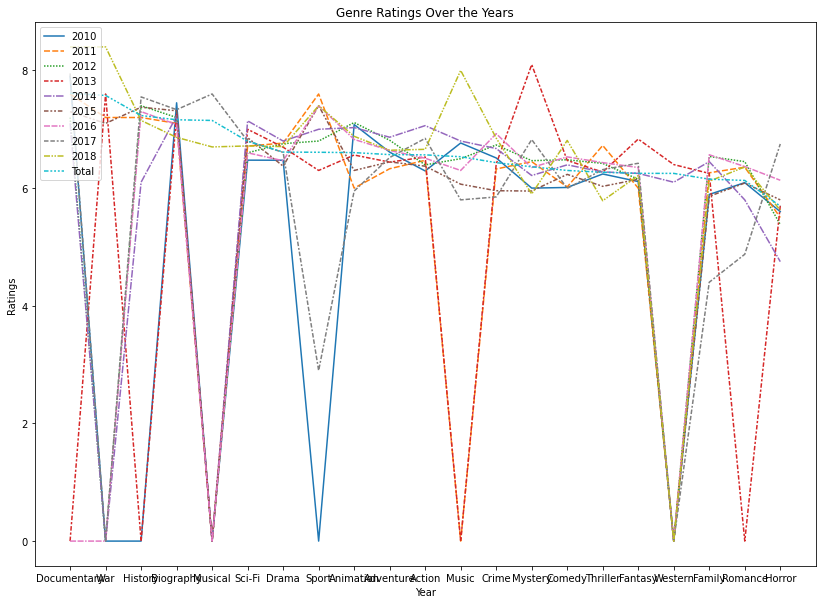

In [138]:
# create the line graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named data3, and you have already transposed it
# If not, you can do data3 = data3.T or data3 = data3.transpose() to transpose it

# Create the line plot using Seaborn
plt.figure(figsize=(14, 10))
sns.lineplot(data=data3)

# Optional: Add labels and title
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.title('Genre Ratings Over the Years')

# Optional: Customize the legend position and labels
plt.legend(loc='upper left')
plt.savefig("Genre Ratings.png")
plt.show()



This is very difficult to read and therefore i need to create a bar graph

In [139]:
# create the mean
data3['Mean'] = data3.mean(axis=1)
data3

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total,Mean
genres,,,,,,,,,,,
Documentary,7.90,7.60,7.20,0.00,7.10,7.30,0.00,7.95,8.40,7.61,6.11
War,0.00,7.20,0.00,7.60,0.00,7.10,0.00,0.00,8.40,7.57,3.79
History,0.00,7.20,7.40,0.00,6.10,7.38,7.30,7.55,7.15,7.23,5.73
Biography,7.45,7.10,7.20,7.25,7.23,7.31,7.08,7.33,6.86,7.16,7.20
Musical,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,6.70,7.15,2.15
Sci-Fi,6.48,6.71,6.60,7.00,7.14,6.86,6.60,6.80,6.72,6.80,6.77
Drama,6.47,6.76,6.76,6.70,6.80,6.37,6.47,6.61,6.71,6.61,6.63
Sport,0.00,7.60,6.80,6.30,7.00,7.40,7.40,2.90,7.40,6.61,5.94
Animation,7.08,6.00,7.11,6.56,7.03,6.30,6.83,5.95,6.88,6.60,6.63


In [140]:
Genre_mean = data3.loc[:, ['Total']]
Genre_mean

year,Total
genres,
Documentary,7.61
War,7.57
History,7.23
Biography,7.16
Musical,7.15
Sci-Fi,6.80
Drama,6.61
Sport,6.61
Animation,6.60


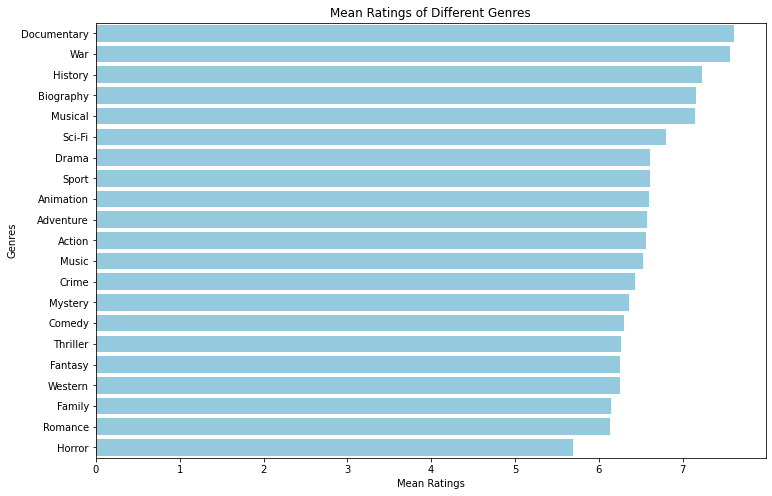

In [141]:
#plot a graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named data_mean
data_mean = pd.DataFrame({
    'genres': ['Documentary', 'War', 'History', 'Biography', 'Musical', 'Sci-Fi', 'Drama', 'Sport', 'Animation',
               'Adventure', 'Action', 'Music', 'Crime', 'Mystery', 'Comedy', 'Thriller', 'Fantasy', 'Western',
               'Family', 'Romance', 'Horror'],
    'mean_ratings': [7.61, 7.57, 7.23, 7.16, 7.15, 6.80, 6.61, 6.61, 6.60, 6.57, 6.56, 6.53, 6.43, 6.36, 6.30, 6.27,
                     6.25, 6.25, 6.15, 6.13, 5.69]
})

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_ratings', y='genres', data=data_mean, color='skyblue')

# Optional: Add labels and title
plt.xlabel('Mean Ratings')
plt.ylabel('Genres')
plt.title('Mean Ratings of Different Genres')
plt.savefig("Mean Ratings for different Genres.png")
plt.show()
